In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(photo_train, label_train), (photo_test, label_test) = mnist.load_data()

In [4]:
photo_train.shape

(60000, 28, 28)

In [5]:
# We have 60,000 photos, and each with 28x28 dimension. We need to put 28x28 into one dimension ie. 784

In [6]:
X_train = photo_train.reshape(60000, 784)
X_test = photo_test.reshape(10000, 784)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train = keras.utils.to_categorical(label_train, 10)
y_test = keras.utils.to_categorical(label_test, 10)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [10]:
#We have One-Hot encoded the target sets so we can apply ANN.

In [11]:
#Visualising the photos:

In [12]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(y_train[num])  
    #Print the label converted back to a number
    label = y_train[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = X_train[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(440)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 640x480 with 1 Axes>

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


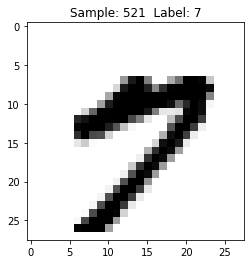

In [13]:
display_sample(521)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


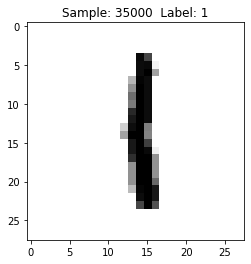

In [14]:
display_sample(35000)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.optimizers import RMSprop

In [26]:

model = Sequential()
model.add(Dense(512, init='uniform', activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))


model.add(Dense(32,init='uniform',activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dropout(0.2))

C:\Users\Siddhartha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", input_dim=784, kernel_initializer="uniform")`
  
C:\Users\Siddhartha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="sigmoid", kernel_initializer="uniform")`
  


In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                16416     
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
________________________________________________

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=15,
                    verbose=2,
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 - 12s - loss: 0.3169 - accuracy: 0.9774 - val_loss: 0.0189 - val_accuracy: 0.9957
Epoch 2/15
 - 12s - loss: 0.3204 - accuracy: 0.9772 - val_loss: 0.0193 - val_accuracy: 0.9957
Epoch 3/15
 - 13s - loss: 0.3152 - accuracy: 0.9777 - val_loss: 0.0181 - val_accuracy: 0.9959
Epoch 4/15
 - 15s - loss: 0.3160 - accuracy: 0.9777 - val_loss: 0.0183 - val_accuracy: 0.9958
Epoch 5/15
 - 13s - loss: 0.3186 - accuracy: 0.9776 - val_loss: 0.0177 - val_accuracy: 0.9959
Epoch 6/15
 - 12s - loss: 0.3131 - accuracy: 0.9782 - val_loss: 0.0167 - val_accuracy: 0.9961
Epoch 7/15
 - 15s - loss: 0.3217 - accuracy: 0.9777 - val_loss: 0.0175 - val_accuracy: 0.9958
Epoch 8/15
 - 17s - loss: 0.3156 - accuracy: 0.9781 - val_loss: 0.0168 - val_accuracy: 0.9960
Epoch 9/15
 - 13s - loss: 0.3118 - accuracy: 0.9785 - val_loss: 0.0153 - val_accuracy: 0.9964
Epoch 10/15
 - 12s - loss: 0.3151 - accuracy: 0.9784 - val_loss: 0.0155 - val_accuracy: 0.9961
Epoch 11/

In [32]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.015328290412575007
Test accuracy: 0.9963098764419556


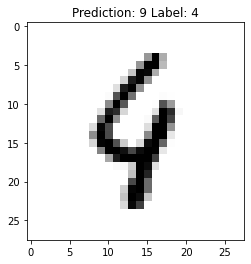

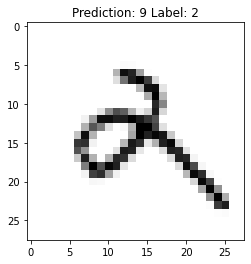

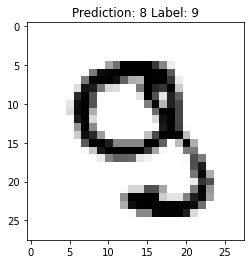

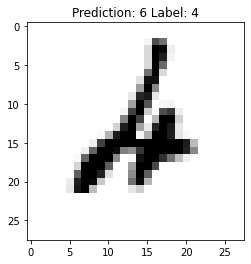

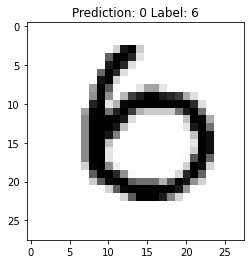

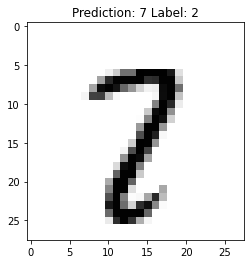

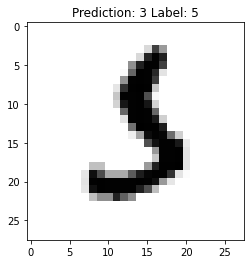

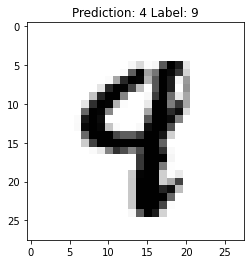

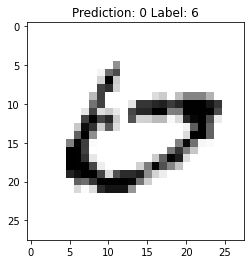

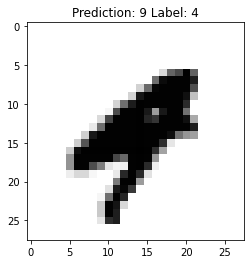

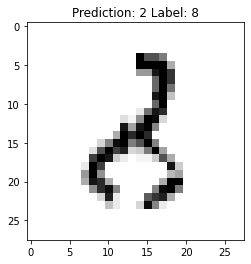

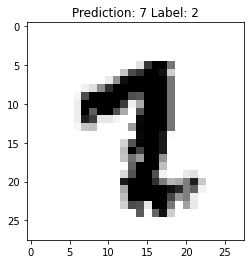

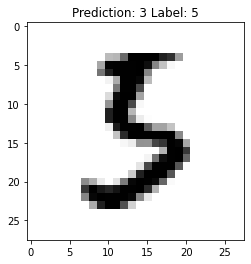

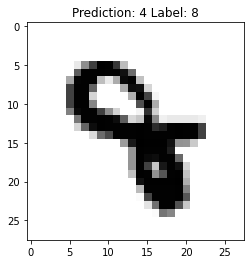

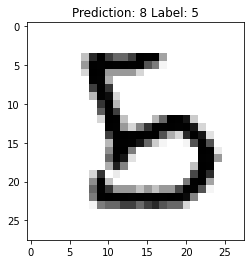

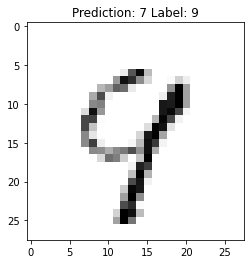

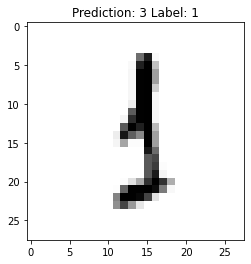

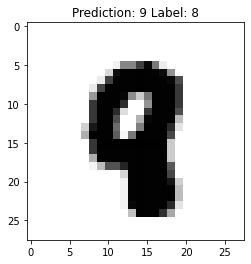

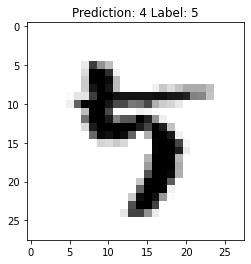

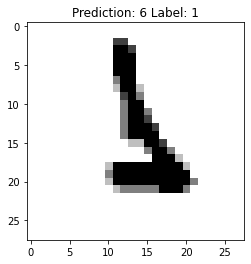

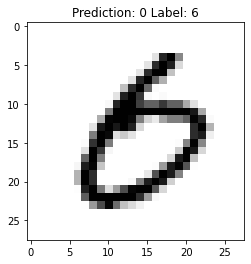

In [33]:
# Wrongly predicted:


for x in range(1000):
    test_image = X_test[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = y_test[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()